# Analysis of Cryptocurrencies

## Table of Contents

[1. Prepare Data Set](#1)

[2. Exploratory Data Analysis](#2)
 - [1.Market Capitalization and Transaction Volume](#2-1)
 - [2.Price Fluctuation of Cryptocurrencies](#2-2)
 - [3.Moving Averages and Price Trend](#2-3)
 - [4.Market Average Price and Cryptocurrencies Correlations](#2-4)
 - [5.Return Ratio](#2-5)
 
[3. Time series decomposition and Random Walks](#3)
 - [1.White Noise and Random Walk](#3-1)
 - [2.Stationarity and Hurst exponent](#3-2)
 - [3.Additional time series analysis](#3-3)

## 1. Prepare Data Set<a id="1"></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 13

In [2]:
# load data sets (top-5 most popular cryptocurrencies)
datasets_folder = "datasets/"

bnb = pd.read_csv(datasets_folder + 'coin_BinanceCoin.csv')
btc = pd.read_csv(datasets_folder + 'coin_Bitcoin.csv')
ada = pd.read_csv(datasets_folder + 'coin_Cardano.csv')
eth = pd.read_csv(datasets_folder + 'coin_Ethereum.csv')
xlm = pd.read_csv(datasets_folder + 'coin_Stellar.csv')

# print datasets general info on the example of Bitcoin
btc.info()

data = [bnb, btc, ada, eth, xlm]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [3]:
# display total number of rows and cols in each data set
crypto_names = ['Binance Coin', 'Bitcoin', 'Cardano', 'Ethereum', 'Stellar']
dim_size  =  lambda dt: [f"{crypto_names[idx]} ->" + 
                           f" Rows: {x.shape[0]}, Cols: {x.shape[1]}" for idx, x in enumerate(dt)]

print('\n'.join(dim_size(data)))

Binance Coin -> Rows: 1442, Cols: 10
Bitcoin -> Rows: 2991, Cols: 10
Cardano -> Rows: 1374, Cols: 10
Ethereum -> Rows: 2160, Cols: 10
Stellar -> Rows: 2527, Cols: 10


In [4]:
# assert that there are no missing values
assert [x.notnull().all().all() for x in data]

# assert that data set contains no duplicated records
assert [x.duplicated().sum() == 0 for x in data]

## 2. Exploratory Data Analysis<a id="2"></a>

* ### Market Capitalization and Transaction Volume<a id="2-1"></a>

In [5]:
# change date values from string to datetime object
str_to_datetime = lambda df : [dt.strptime(x, '%Y-%m-%d %H:%M:%S')
                               for x in df['Date']]

bnb['Date'] = str_to_datetime(bnb)
btc['Date'] = str_to_datetime(btc)
ada['Date'] = str_to_datetime(ada)
eth['Date'] = str_to_datetime(eth)
xlm['Date'] = str_to_datetime(xlm)

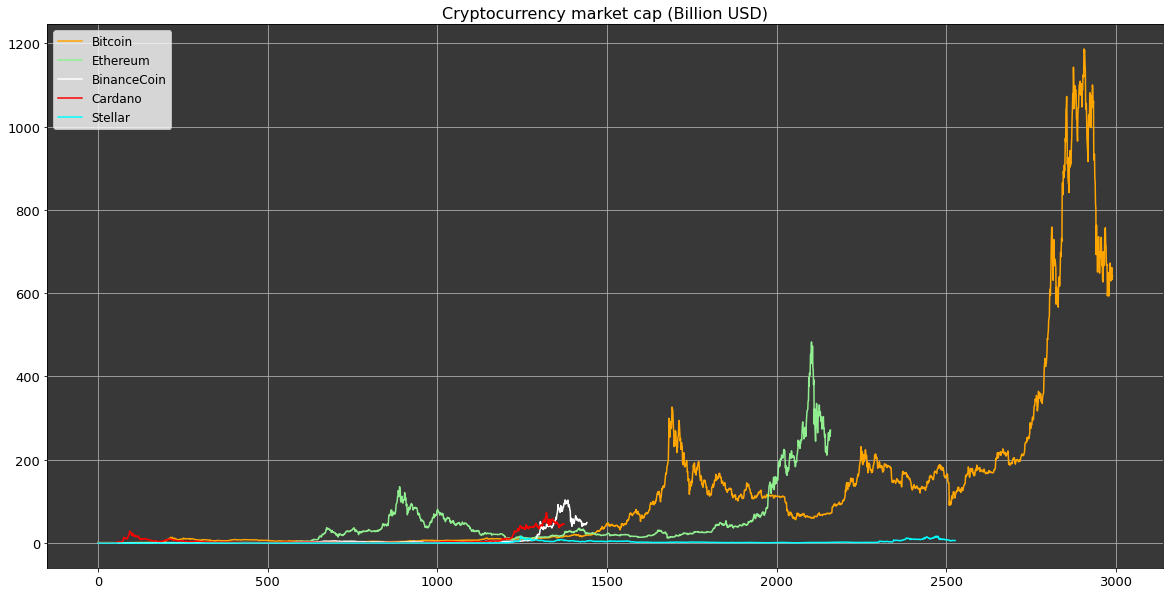

In [6]:
# plot market capitalization
def plot_market_cap():
    fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(btc['Marketcap']/10**9, color='orange', label='Bitcoin')
    ax.plot(eth['Marketcap']/10**9, color='lightgreen', label='Ethereum')
    ax.plot(bnb['Marketcap']/10**9, color='white', label='BinanceCoin')
    ax.plot(ada['Marketcap']/10**9, color='red', label='Cardano')
    ax.plot(xlm['Marketcap']/10**9, color='cyan', label='Stellar')

    ax.legend(prop={"size":12})
    ax.set_facecolor('#383838')
    ax.set_title('Cryptocurrency market cap (Billion USD)',
          fontsize=16)
    ax.grid(True)

plot_market_cap()

In [7]:
date_condition = "2017-10-02 23:59:59"

bnb = bnb.iloc[bnb.index[bnb["Date"] == date_condition].tolist()[0]:]
btc = btc.iloc[btc.index[btc["Date"] == date_condition].tolist()[0]:]
ada = ada.iloc[ada.index[ada["Date"] == date_condition].tolist()[0]:]
eth = eth.iloc[eth.index[eth["Date"] == date_condition].tolist()[0]:]
xlm = xlm.iloc[xlm.index[xlm["Date"] == date_condition].tolist()[0]:]

upd_data = [x.reset_index(drop=True) for x in [bnb, btc, ada, eth, xlm]]
print('\n'.join(dim_size(upd_data)))

Binance Coin -> Rows: 1374, Cols: 10
Bitcoin -> Rows: 1374, Cols: 10
Cardano -> Rows: 1374, Cols: 10
Ethereum -> Rows: 1374, Cols: 10
Stellar -> Rows: 1374, Cols: 10


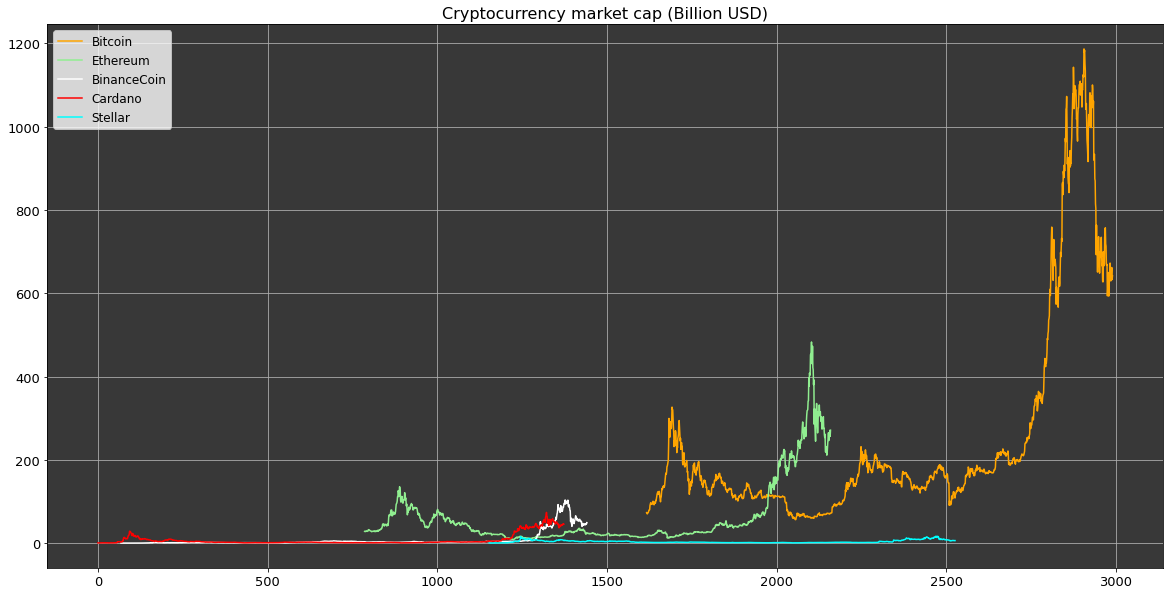

In [8]:
# plot market capitalization
plot_market_cap()

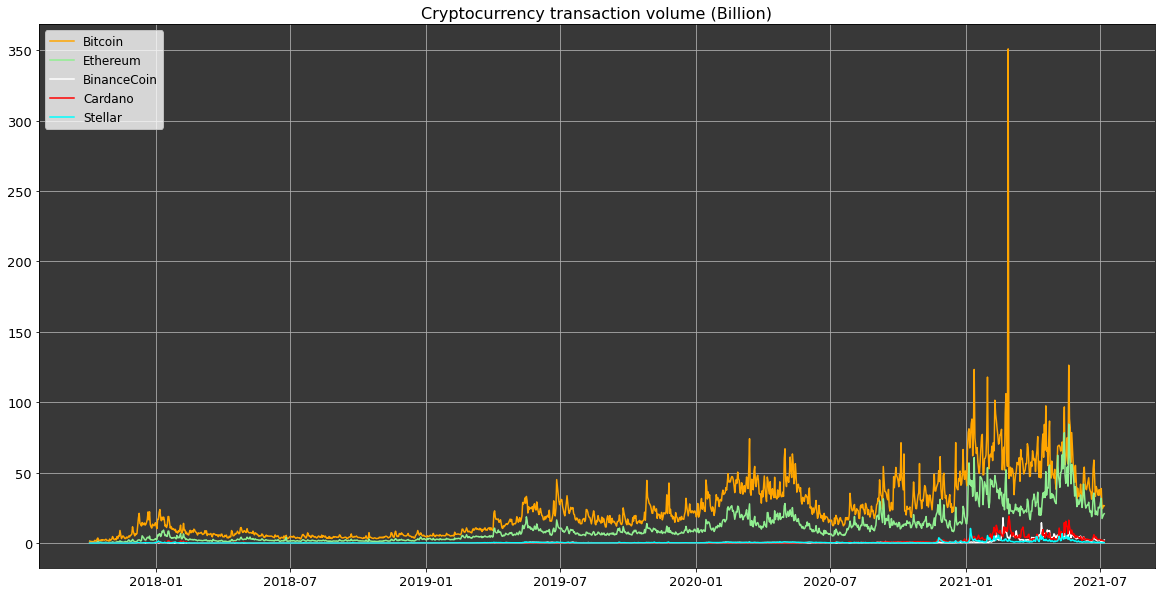

In [9]:
# plot transaction volume
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc['Date'], btc['Volume']/10**9, color='orange', label='Bitcoin')
ax.plot(eth['Date'], eth['Volume']/10**9, color='lightgreen', label='Ethereum')
ax.plot(bnb['Date'], bnb['Volume']/10**9, color='white', label='BinanceCoin')
ax.plot(ada['Date'], ada['Volume']/10**9, color='red', label='Cardano')
ax.plot(xlm['Date'], xlm['Volume']/10**9, color='cyan', label='Stellar')

ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('Cryptocurrency transaction volume (Billion)',
          fontsize=16)
ax.grid(True)

* ### Price Fluctuation of Cryptocurrencies<a id="2-2"></a>

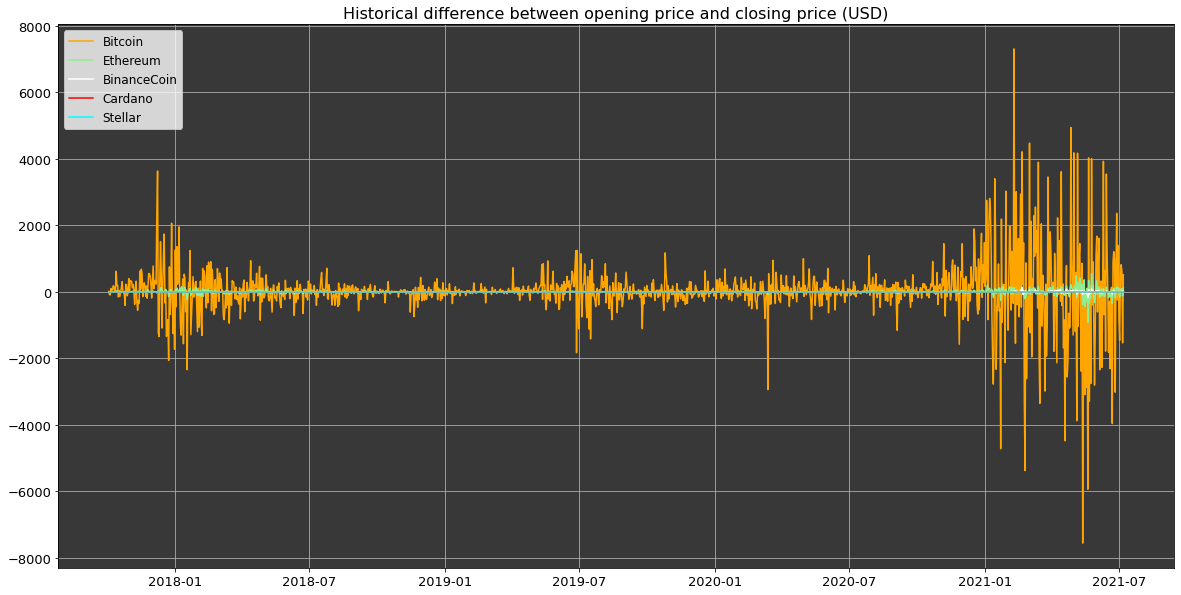

In [10]:
# plot difference between opening and closing price
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc['Date'], btc['Close']-btc['Open'], color='orange', label='Bitcoin')
ax.plot(eth['Date'], eth['Close']-eth['Open'], color='lightgreen', label='Ethereum')
ax.plot(bnb['Date'], bnb['Close']-bnb['Open'], color='white', label='BinanceCoin')
ax.plot(ada['Date'], ada['Close']-ada['Open'], color='red', label='Cardano')
ax.plot(xlm['Date'], xlm['Close']-xlm['Open'], color='cyan', label='Stellar')

ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('Historical difference between opening price and closing price (USD)',
          fontsize=16)
ax.grid(True)

# plt.savefig("cryptocurrencies_price_fluctuation.png")

In [11]:
# average difference for each cryptocurrency
ave_diff={'Bitcoin': (btc['Close']-btc['Open']).mean(),
          'Ethereum': (eth['Close']-eth['Open']).mean(),
          'BinanceCoin': (bnb['Close']-bnb['Open']).mean(),
          'Cardano': (ada['Close']-ada['Open']).mean(),
          'Stellar': (xlm['Close']-xlm['Open']).mean(),
}

pd.DataFrame(ave_diff, index=['Average difference (USD)'])

,Bitcoin,Ethereum,BinanceCoin,Cardano,Stellar
Average difference (USD),21.279072,1.410467,0.232152,0.001026,0.000167


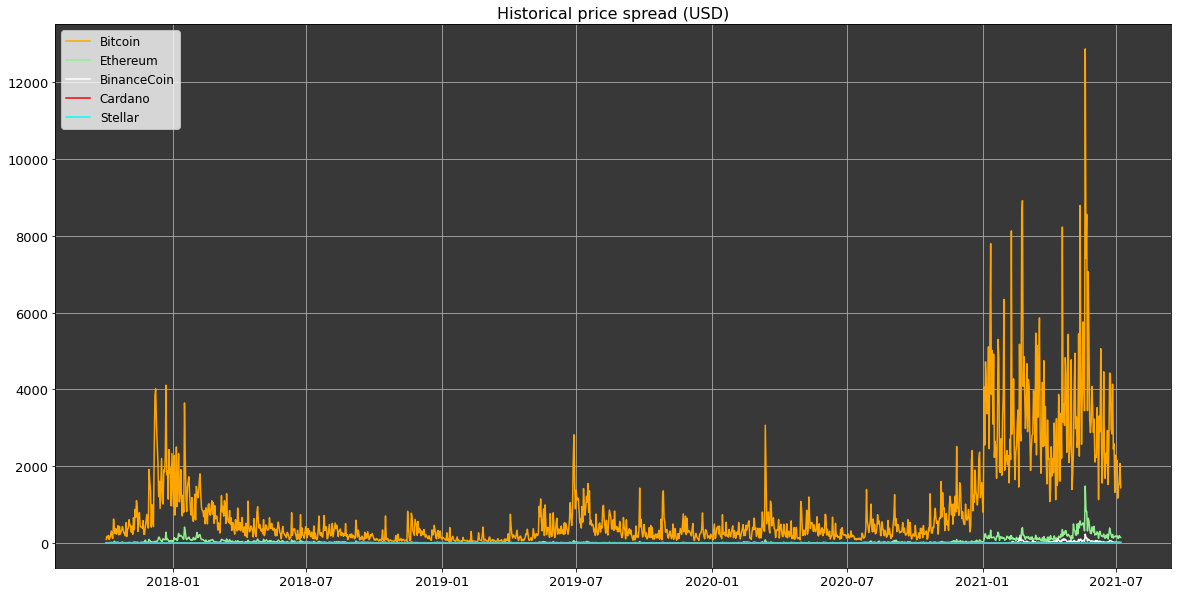

In [12]:
# plot difference between daily highest price and lowest price
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc['Date'], btc['High']-btc['Low'], color='orange', label='Bitcoin')
ax.plot(eth['Date'], eth['High']-eth['Low'], color='lightgreen', label='Ethereum')
ax.plot(bnb['Date'], bnb['High']-bnb['Low'], color='white', label='BinanceCoin')
ax.plot(ada['Date'], ada['High']-ada['Low'], color='red', label='Cardano')
ax.plot(xlm['Date'], xlm['High']-xlm['Low'], color='cyan', label='Stellar')


ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('Historical price spread (USD)',
          fontsize=16)
ax.grid(True)

In [13]:
# average spread for each cryptocurrency
ave_spread={'Bitcoin': (btc['High']-btc['Low']).mean(),
          'Ethereum': (eth['High']-eth['Low']).mean(),
          'Binance Coin': (bnb['High']-bnb['Low']).mean(),
          'Cardano': (ada['High']-ada['Low']).mean(),
          'Stellar': (xlm['High']-xlm['Low']).mean(),
}

pd.DataFrame(ave_spread, index=['Average spread (USD)'])

,Bitcoin,Ethereum,Binance Coin,Cardano,Stellar
Average spread (USD),840.436858,48.196556,5.861984,0.030097,0.0199


* ### Moving Averages and Price Trend<a id="2-3"></a>

In [14]:
# calculate 5-day moving averages
def ma_for_5days(df, symbol):
    df_close = df[['Close', 'Date']]
    df_close.columns = [symbol, 'Date']
    df_close.set_index('Date', inplace = True)
    df_ma = df_close.rolling(window=5).mean()
    return df_close, df_ma

btc_close, btc_ma = ma_for_5days(btc, 'Bitcoin')
eth_close, eth_ma = ma_for_5days(eth, 'Ethereum')
bnb_close, bnb_ma = ma_for_5days(bnb, 'BinanceCoin')
ada_close, ada_ma = ma_for_5days(ada, 'Cardano')
xlm_close, xlm_ma = ma_for_5days(xlm, 'Stellar')

# create matrix of close price only for later use
close = pd.concat([btc_close, eth_close,
                   bnb_close, ada_close, xlm_close], axis=1)

close_ma = pd.concat([btc_ma, eth_ma, bnb_ma,
                     ada_ma, xlm_ma], axis=1)

close_ma.tail()

,Bitcoin,Ethereum,BinanceCoin,Cardano,Stellar
Date,,,,,
2021-07-02 23:59:59,34562.423308,2155.723878,293.736608,1.361334,0.272095
2021-07-03 23:59:59,34609.265926,2185.015247,295.477208,1.377751,0.272259
2021-07-04 23:59:59,34493.266332,2217.206399,296.981318,1.395700,0.269721
2021-07-05 23:59:59,34234.299373,2202.013349,296.797738,1.399985,0.264016
2021-07-06 23:59:59,34366.914533,2244.228134,303.341018,1.416474,0.262105


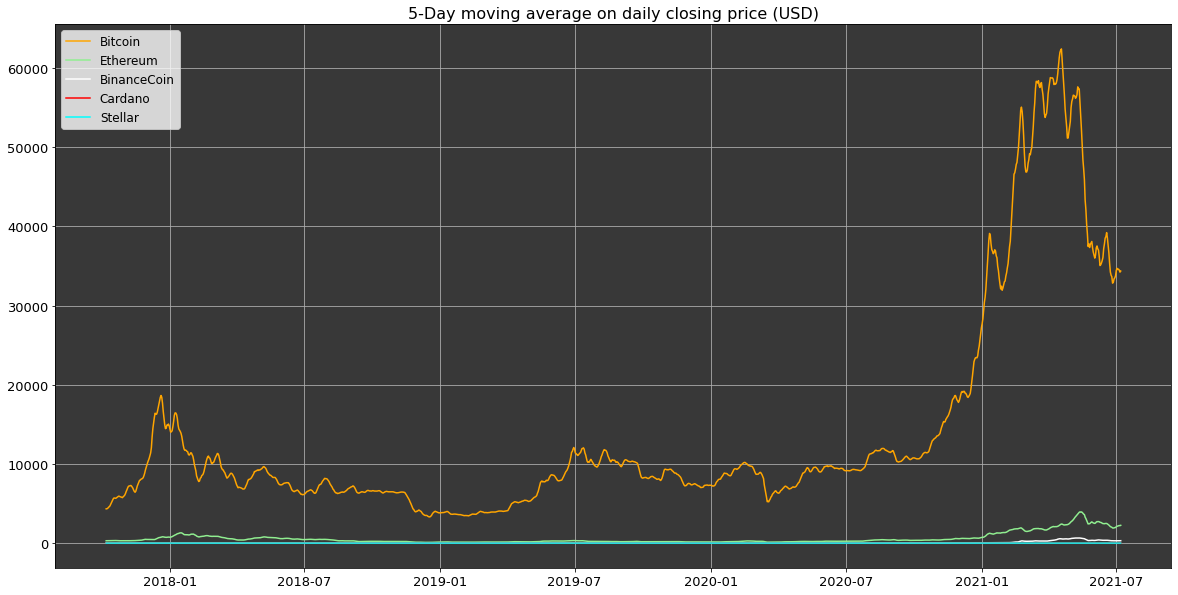

In [15]:
# plot moving average for closing price
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc_ma, color='orange', label='Bitcoin')
ax.plot(eth_ma, color='lightgreen', label='Ethereum')
ax.plot(bnb_ma, color='white', label='BinanceCoin')
ax.plot(ada_ma, color='red', label='Cardano')
ax.plot(xlm_ma, color='cyan', label='Stellar')

ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('5-Day moving average on daily closing price (USD)',
          fontsize=16)
ax.grid(True)

* ### Market Average Price and Cryptocurrencies Correlations<a id="2-4"></a>

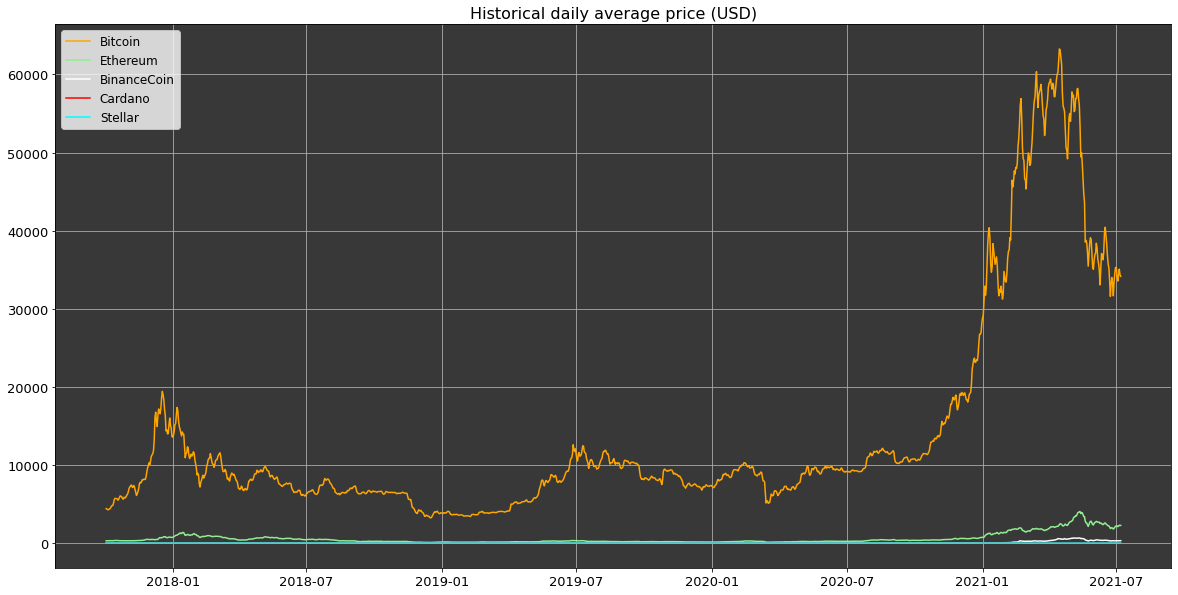

In [16]:
# calculate daily average price
daily_avg = lambda df : (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

# plot daily average price
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc['Date'], daily_avg(btc), color='orange', label='Bitcoin')
ax.plot(eth['Date'], daily_avg(eth), color='lightgreen', label='Ethereum')
ax.plot(bnb['Date'], daily_avg(bnb), color='white', label='BinanceCoin')
ax.plot(ada['Date'], daily_avg(ada), color='red', label='Cardano')
ax.plot(xlm['Date'], daily_avg(xlm), color='cyan', label='Stellar')


ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('Historical daily average price (USD)',
          fontsize=16)
ax.grid(True)

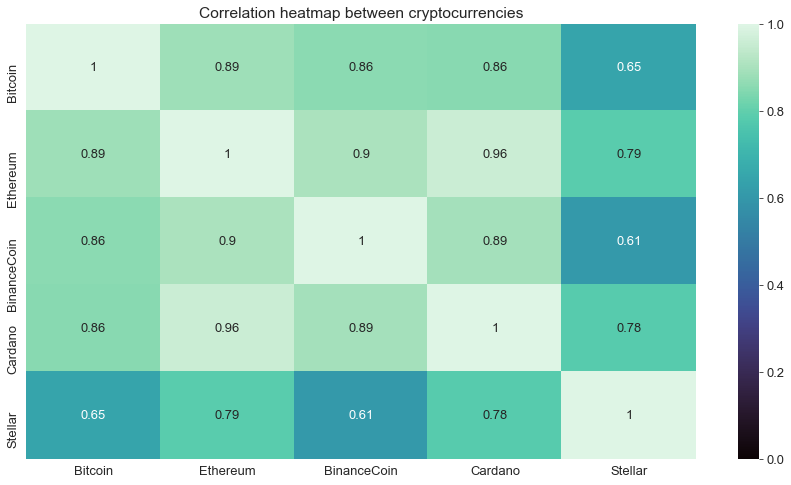

In [17]:
import seaborn as sns; sns.set_style("whitegrid")

plt.figure(figsize=(15,8))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap="mako", annot=True)
plt.title('Correlation heatmap between cryptocurrencies')
# plt.savefig("cryptocurrencies_correlations.png")
plt.show()

* ### Return Ratio<a id="2-5"></a>

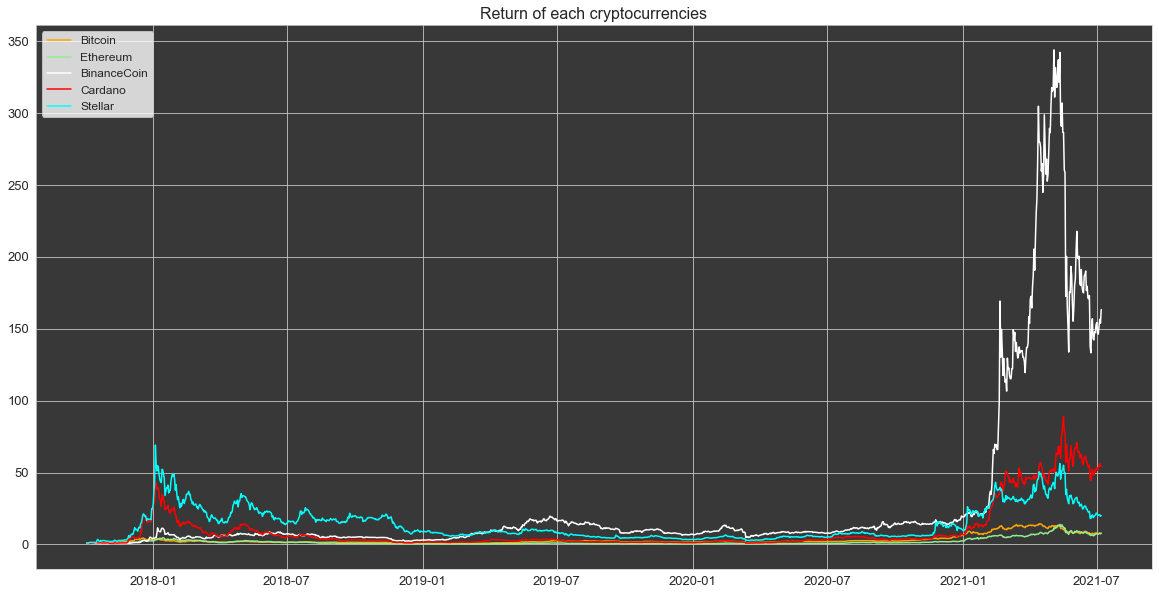

In [18]:
# plot return ration average price
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(btc_close.apply(lambda x: x/x[0]), color='orange', label='Bitcoin')
ax.plot(eth_close.apply(lambda x: x/x[0]), color='lightgreen', label='Ethereum')
ax.plot(bnb_close.apply(lambda x: x/x[0]), color='white', label='BinanceCoin')
ax.plot(ada_close.apply(lambda x: x/x[0]), color='red', label='Cardano')
ax.plot(xlm_close.apply(lambda x: x/x[0]), color='cyan', label='Stellar')

ax.legend(prop={"size":12}, loc='upper left')
ax.set_facecolor('#383838')
ax.set_title('Return of each cryptocurrencies',
          fontsize=16)
ax.grid(True)
# plt.savefig("cryptocurrencies_return_ratio.png")

## 3. Time series decomposition and Random Walks<a id="3"></a>

* ### White Noise and Random Walk<a id="3-1"></a>

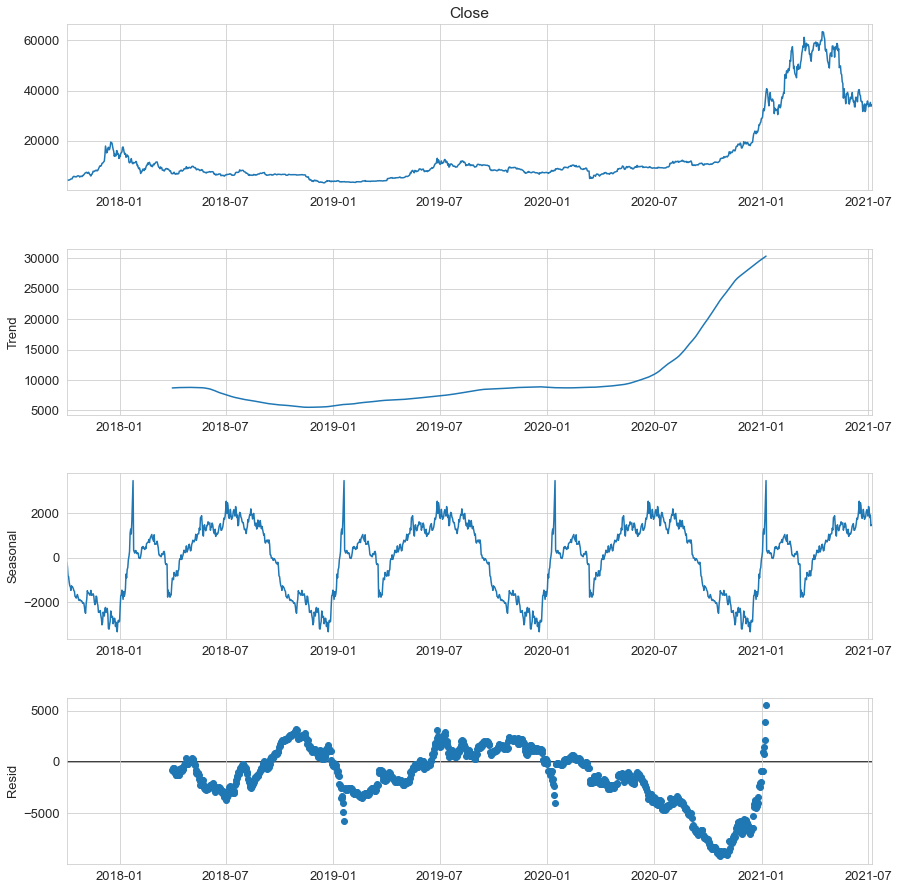

In [19]:
import statsmodels.api as sm

btc.set_index('Date', inplace = True)
# print(btc.head())
close_price = btc['Close']

decomposed_btc_price = sm.tsa.seasonal_decompose(close_price, period=360)
figure = decomposed_btc_price.plot()
figure.set_size_inches(15, 15)
plt.subplots_adjust(wspace=0, hspace=0.35)
plt.show()

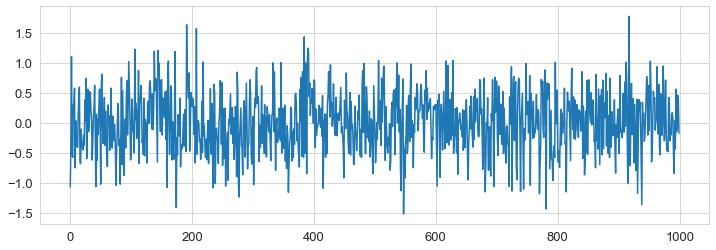

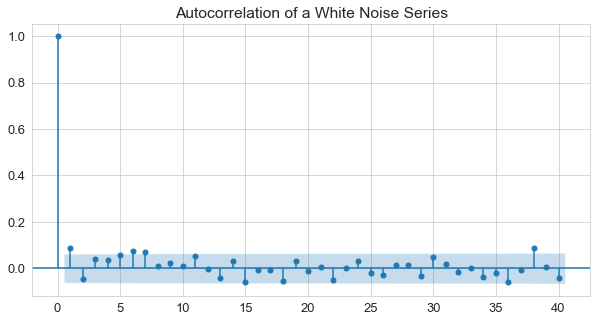

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

# Generate Gaussian white noise dist with mean 0 and 0.5 std
noise = np.random.normal(loc=0, scale=0.5, size=1000)
plt.figure(figsize=(12, 4))
plt.plot(noise)

fig = plot_acf(noise, lags=40)
fig.set_size_inches(10, 5)
plt.title("Autocorrelation of a White Noise Series")
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
adf = adfuller(close_price)
print(f"p-value of BTC: {float(adf[1])}")

p-value of BTC: 0.8324688625908016


* ### Stationarity and Hurst exponent<a id="3-2"></a>

<AxesSubplot:xlabel='Date'>

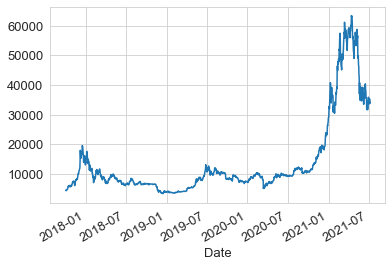

In [22]:
# The original non-stationary plot
decomposed_btc_price.observed.plot()

<AxesSubplot:xlabel='Date'>

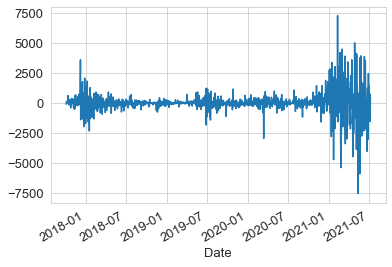

In [23]:
# The new stationary plot
decomposed_btc_price.observed.diff().plot()

* #### Diffusive behavior analysis (Hurst exponent)

In [24]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

for lag in [10, 20, 50, 100, 250]:
    hurst_exp = get_hurst_exponent(close_price.values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 10 lags: 0.5480
Hurst exponent with 20 lags: 0.5381
Hurst exponent with 50 lags: 0.5425
Hurst exponent with 100 lags: 0.5678
Hurst exponent with 250 lags: 0.5154


* #### Rescaled range analysis (Hurst exponent)

In [25]:
def get_hurst_exponent_r_s(time_series):
    """Returns the Hurst Exponent of the time series using R/S analysis"""
    time_series = list(time_series)
    N = len(time_series)
    R_S_dict = []
    
    for k in range(10, int(np.floor(N/2))+1):
        R, S = 0, 0
        
        # split time_series into subsets
        subset_list = [time_series[i:i+k] for i in range(0, N, k)]
        
        if np.mod(N, k) > 0:
            subset_list.pop()
     
        # calc mean of every subset
        mean_list=[np.mean(x) for x in subset_list]
        
        for i in range(len(subset_list)):
            cumsum_list = pd.Series(subset_list[i] - mean_list[i]).cumsum()
            R += max(cumsum_list) - min(cumsum_list)
            S += np.std(subset_list[i])
            
        R_S_dict.append({"R":R/len(subset_list), "S":S/len(subset_list), "n":k})
        
    log_R_S, log_n = [], []
 
    for i in range(len(R_S_dict)):
        R_S = (R_S_dict[i]["R"]) / (R_S_dict[i]["S"])
        
        log_R_S.append(np.log(R_S))
        log_n.append(np.log(R_S_dict[i]["n"]))

    reg = np.polyfit(log_n, log_R_S, 1)
    
    return reg[0]

hurst_exp = get_hurst_exponent_r_s(close_price.values)
print(f"Hurst exponent using R/S analysis: {hurst_exp:.4f}")

Hurst exponent using R/S analysis: 0.9347


* ### Additional time series analysis<a id="3-3"></a>

Text(0.5, 1.0, 'BTC close price hist')

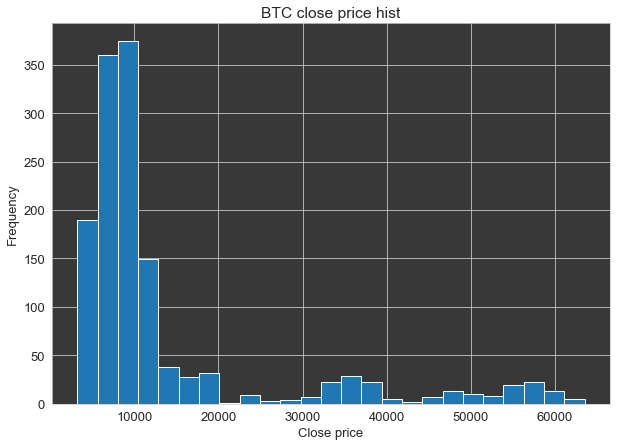

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
close_price.hist(ax=ax, bins=25)
ax.set_xlabel("Close price")
ax.set_ylabel("Frequency")
ax.set_facecolor('#383838')
ax.set_title(f"BTC close price hist")

In [27]:
close_price_stats = close_price.describe()
print(close_price_stats)
print(f"\nV = {round(close_price_stats['std']/close_price_stats['mean'], 6)}")

count     1374.000000
mean     13768.462767
std      13600.221757
min       3236.761645
25%       6687.612345
50%       8911.304128
75%      11582.025883
max      63503.457930
Name: Close, dtype: float64

V = 0.987781


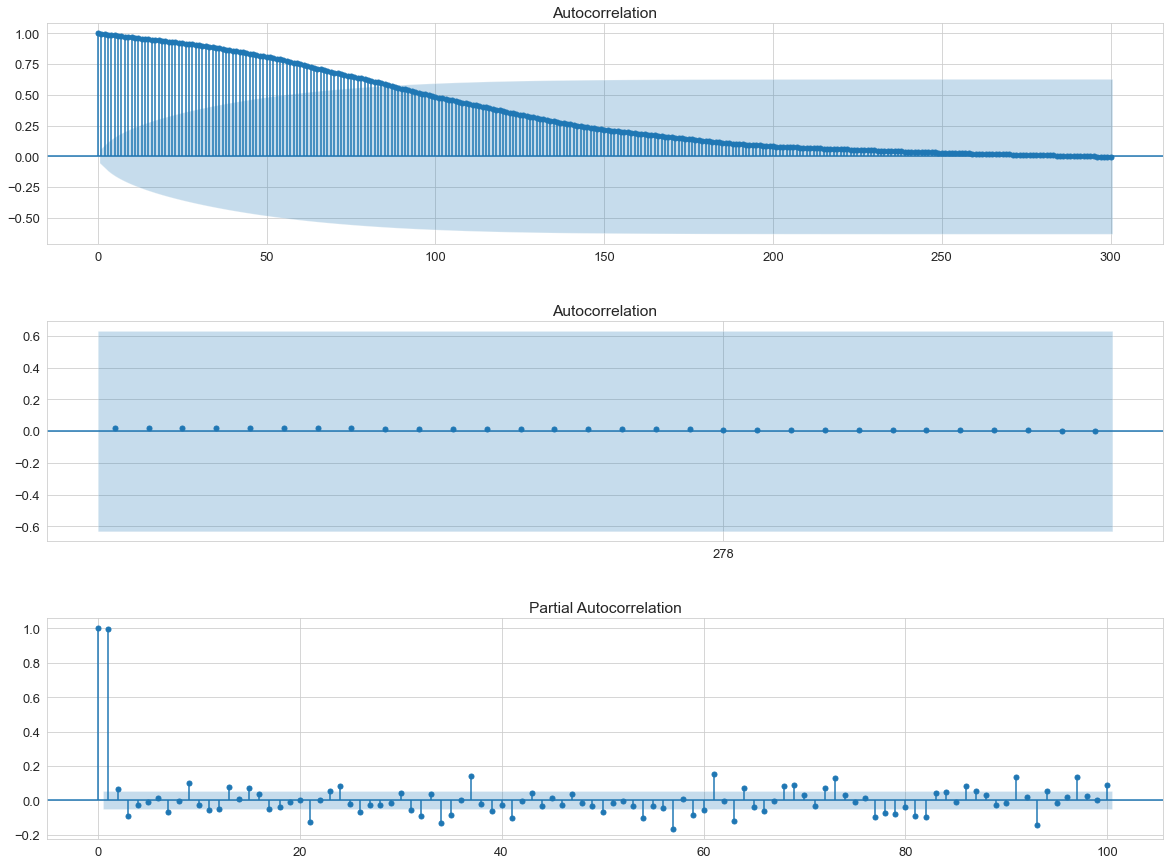

In [28]:
plt.figure(figsize=(20, 15))
ax = plt.subplot(311)
sm.graphics.tsa.plot_acf(close_price.values, lags=300, ax=ax)
ax = plt.subplot(312)
sm.graphics.tsa.plot_acf(close_price.values, lags=np.arange(260, 290, 1), ax=ax)
ax.set_xticks([278])
ax = plt.subplot(313)
sm.graphics.tsa.plot_pacf(close_price.values, lags=100, ax=ax)
plt.subplots_adjust(wspace=0, hspace=0.35)
plt.show()

In [29]:
from statsmodels.tsa.stattools import kpss

# KPSS test
kpss = kpss(close_price, regression='ct')
print(f"p-value of BTC: {float(kpss[1])}")

p-value of BTC: 0.01


C:\Download\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Download\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


Text(0.5, 1.0, 'BTC volatility: 67.488 %')

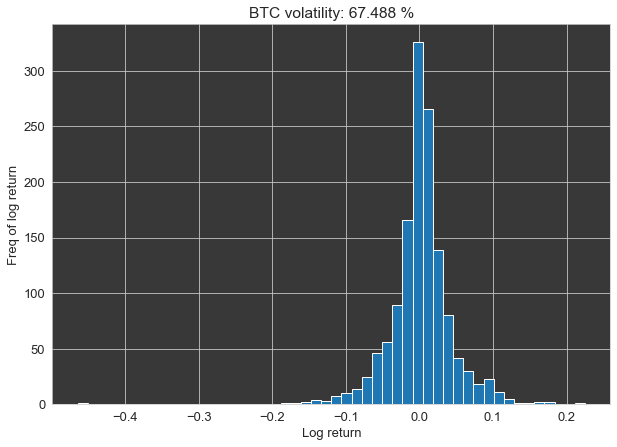

In [30]:
btc_with_log = btc.copy()
btc_with_log['Log returns'] = np.log(btc_with_log['Close']/btc_with_log['Close'].shift())
volatility = btc_with_log['Log returns'].std()*252**.5
volatility = round(volatility * 100, 3)

fig, ax = plt.subplots(figsize=(10,7))
btc_with_log['Log returns'].hist(ax=ax, bins=50)
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_facecolor('#383838')
ax.set_title(f"BTC volatility: {volatility} %")

In [31]:
def samp_en(L, m, r):
    """Compute Sample entropy"""
    N = len(L)
    A, B = 0.0, 0.0    
    
    # Split time series and save all templates of length m
    xmi = np.array([L[i : i + m] for i in range(N - m)])
    xmj = np.array([L[i : i + m] for i in range(N - m + 1)])

    # Save all matches minus the self-match, compute B
    B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= r) - 1 for xmii in xmi])

    # Similar for computing A
    m += 1
    xm = np.array([L[i : i + m] for i in range(N - m + 1)])

    A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= r) - 1 for xmi in xm])

    # Return SampEn
    return -np.log(A / B)

print("Sample entropy of BTC:", samp_en(close_price, m=2, r=0.2*np.std(close_price)))

Sample entropy of BTC: 0.044066926411278996
